In [1]:
import os
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
STATE_LABELS = {
    "RLController_FDTask_pos": "RL+QP (FDTask)",
    "RLController_PureRL": "RL",
    "RLController_TorqueTask_pos": "RL+QP (TorqueTask)",
}

STATE_COLORS = {
    "RLController_FDTask_pos": "deepskyblue",
    "RLController_FDTask_torque": "royalblue",
    "RLController_PureRL": "darkgrey",
    "RLController_TorqueTask_pos": "coral",
    "RLController_TorqueTask_torque": "darkred",
}

In [ ]:
df_RL = pd.read_csv("RL-simuHardVel.csv", sep=';')
df_RL.columns = [c.strip() for c in df_RL.columns]
df_FDTask = pd.read_csv("FDTask-simuHardVel.csv", sep=';')
df_FDTask.columns = [c.strip() for c in df_FDTask.columns]
df_TorqueTask = pd.read_csv("TorqueTask-simuHardVel.csv", sep=';')
df_TorqueTask.columns = [c.strip() for c in df_TorqueTask.columns]

In [4]:
df_RL.columns.tolist()
# Save column names to a text file
with open("csv_columns.txt", "w") as f:
    for col in df_RL.columns:
        f.write(f"{col}\n")

In [5]:
# Limits given to the QP
torque_limit_up = np.array([150.0, 150.0, 150.0, 150.0, 30.0, 150.0, 150.0, 150.0, 150.0, 30.0,
                150.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0])
torque_limit_low = np.array([-150.0, -150.0, -150.0, -150.0, -30.0, -150.0, -150.0, -150.0, -150.0, -30.0,
                -150.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0])

q_limit_up = np.array([0.48, 0.35, 2.58, 2.1,  0.57, 0.48, 0.35, 2.58, 2.1,  0.57, 0.35,
            1.05, 0.39, 1.35, 1.3,  1.05, 0.39, 1.35, 1.3])
q_limit_low = np.array([-0.48, -0.35, -2.58,  0.05, -0.92, -0.48, -0.35, -2.58,  0.05,
            -0.92, -0.35, -1.05, -0.39, -1.35, -1.3,  -1.05, -0.39, -1.35, -1.3])


q_limit_soft_up = np.array([df_RL[f"RLController_q_lim_upper_{i}"].to_numpy()[0].item() for i in range(19)])
q_limit_soft_low = np.array([df_RL[f"RLController_q_lim_lower_{i}"].to_numpy()[0].item() for i in range(19)])

qdot_limit_up = np.array([df_RL[f"RLController_qdot_limHard_upper_{i}"].to_numpy()[0].item() for i in range(19)])
qdot_limit_low = np.array([df_RL[f"RLController_qdot_limHard_lower_{i}"].to_numpy()[0].item() for i in range(19)])

qdot_limit_soft_up = np.array([df_RL[f"RLController_qdot_lim_upper_{i}"].to_numpy()[0].item() for i in range(19)])
qdot_limit_soft_low = np.array([df_RL[f"RLController_qdot_lim_lower_{i}"].to_numpy()[0].item() for i in range(19)])

# Soft limit
collision_columns_di = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_di")]
# Hard limit
collision_columns_ds = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_ds")]

collision_limit = np.array([df_RL[collision_columns_ds[i]].to_numpy()[0].item() for i in range(len(collision_columns_ds))])
collision_limit_soft = np.array([df_RL[collision_columns_di[i]].to_numpy()[0].item() for i in range(len(collision_columns_di))])

print("Torque limits up:", torque_limit_up)
print("Torque limits low:", torque_limit_low)
print("Position limits up:", q_limit_up)
print("Position limits low:", q_limit_low)
print("Soft position limits up:", q_limit_soft_up)
print("Soft position limits low:", q_limit_soft_low)
print("Velocity limits up:", qdot_limit_up)
print("Velocity limits low:", qdot_limit_low)
print("Soft velocity limits up:", qdot_limit_soft_up)
print("Soft velocity limits low:", qdot_limit_soft_low)
print("Collision limits (hard):", collision_limit)
print("Collision limits (soft):", collision_limit_soft)


Torque limits up: [150. 150. 150. 150.  30. 150. 150. 150. 150.  30. 150.  30.  30.  30.
  30.  30.  30.  30.  30.]
Torque limits low: [-150. -150. -150. -150.  -30. -150. -150. -150. -150.  -30. -150.  -30.
  -30.  -30.  -30.  -30.  -30.  -30.  -30.]
Position limits up: [0.48 0.35 2.58 2.1  0.57 0.48 0.35 2.58 2.1  0.57 0.35 1.05 0.39 1.35
 1.3  1.05 0.39 1.35 1.3 ]
Position limits low: [-0.48 -0.35 -2.58  0.05 -0.92 -0.48 -0.35 -2.58  0.05 -0.92 -0.35 -1.05
 -0.39 -1.35 -1.3  -1.05 -0.39 -1.35 -1.3 ]
Soft position limits up: [0.4704 0.343  2.5284 2.0795 0.5551 0.4704 0.343  2.5284 2.0795 0.5551
 0.343  1.029  0.3822 1.323  1.274  1.029  0.3822 1.323  1.274 ]
Soft position limits low: [-0.4704 -0.343  -2.5284  0.0705 -0.9051 -0.4704 -0.343  -2.5284  0.0705
 -0.9051 -0.343  -1.029  -0.3822 -1.323  -1.274  -1.029  -0.3822 -1.323
 -1.274 ]
Velocity limits up: [23 23 23 14  9 23 23 23 14  9 23  9  9 20 20  9  9 20 20]
Velocity limits low: [-23 -23 -23 -14  -9 -23 -23 -23 -14  -9 -23  -9  

In [6]:
torque_column_names = [f"tauOut_{i}" for i in range(19)]
q_column_names = [f"qIn_{i}" for i in range(19)]
qdot_column_names = [f"alphaIn_{i}" for i in range(19)]

In [7]:
def icra_style():
    """Apply a compact ICRA-like style for paper figures."""
    rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'DejaVu Sans', 'Arial'],
        'pdf.fonttype': 42,  # ensure editable text in vector pdfs
        'ps.fonttype': 42,
        'font.size': 8,
        'axes.titlesize': 9,
        'axes.labelsize': 8,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        'axes.linewidth': 0.6,
    })

# Right Gains plots

In [8]:
# Get the min and max time value across all dataframes (last value of the 't' column)
min_time = min(df_RL['t'].iloc[-1], df_FDTask['t'].iloc[-1], df_TorqueTask['t'].iloc[-1])
print(f"Min time: {min_time}s")

min_time_Task = min(df_FDTask['t'].iloc[-1], df_TorqueTask['t'].iloc[-1])
print(f"Min time (Tasks only): {min_time_Task}s")

max_time = max(df_RL['t'].iloc[-1], df_FDTask['t'].iloc[-1], df_TorqueTask['t'].iloc[-1])
print(f"Max time: {max_time}s")

# Convert time to iteration by counting the number of rows in each dataframe
num_iterations_RL = df_RL.shape[0]
num_iterations_FDTask = df_FDTask.shape[0]
num_iterations_TorqueTask = df_TorqueTask.shape[0]
print(f"Number of iterations: RL = {num_iterations_RL}, FDTask = {num_iterations_FDTask}, TorqueTask = {num_iterations_TorqueTask}")

min_iterations = min(num_iterations_RL, num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Min iterations: {min_iterations}")
min_iterations_Task = min(num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Min iterations (Tasks only): {min_iterations_Task}")
max_iterations = max(num_iterations_RL, num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Max iterations: {max_iterations}")

freq = round(max_iterations / max_time)
print(f"Frequency: {freq} Hz")
dt = 1.0 / freq
print(f"Time step: {dt} s")



Min time: 31.0025s
Min time (Tasks only): 31.48s
Max time: 32.9975s
Number of iterations: RL = 12402, FDTask = 13200, TorqueTask = 12593
Min iterations: 12402
Min iterations (Tasks only): 12593
Max iterations: 13200
Frequency: 400 Hz
Time step: 0.0025 s


## $\tau_{err} = \tau_{cmd} - \tau_{RL}$ for TorqueTask and FDTask

<>:9: SyntaxWarning: invalid escape sequence '\|'
<>:9: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_30560/1508508517.py:9: SyntaxWarning: invalid escape sequence '\|'
  plt.ylabel("$\| \\tau_{cmd}-\\tau_{RL} \|$ [Nm]")


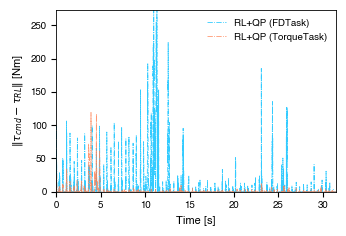

In [9]:
# Plot "tau_err" for FDTask and TorqueTask
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.plot(df_FDTask['t'], df_FDTask['RLController_tau_err_norm'], label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], linewidth=0.6, linestyle="-.", alpha=0.8)
plt.plot(df_TorqueTask['t'], df_TorqueTask['RLController_tau_err_norm'], label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], linewidth=0.6, linestyle="-.", alpha=0.8)
plt.xlim(0, min_time_Task)
plt.ylim(0, 273.12)
plt.xlabel("Time [s]")
plt.ylabel("$\| \\tau_{cmd}-\\tau_{RL} \|$ [Nm]")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("torque_error_comparison_simu.pdf", dpi=300)
plt.show()

In [10]:
# Compute the mean and std of "tau_err" for FDTask and TorqueTask over the common time range
common_time_mask_FDTask = df_FDTask['t'] <= min_time_Task
common_time_mask_TorqueTask = df_TorqueTask['t'] <= min_time_Task
mean_tau_err_FDTask = df_FDTask.loc[common_time_mask_FDTask, 'RLController_tau_err_norm'].mean()
std_tau_err_FDTask = df_FDTask.loc[common_time_mask_FDTask, 'RLController_tau_err_norm'].std()
mean_tau_err_TorqueTask = df_TorqueTask.loc[common_time_mask_TorqueTask, 'RLController_tau_err_norm'].mean()
std_tau_err_TorqueTask = df_TorqueTask.loc[common_time_mask_TorqueTask, 'RLController_tau_err_norm'].std()
max_tau_err_FDTask = df_FDTask.loc[common_time_mask_FDTask, 'RLController_tau_err_norm'].max()
max_tau_err_TorqueTask = df_TorqueTask.loc[common_time_mask_TorqueTask, 'RLController_tau_err_norm'].max()
print(f"Max torque error FDTask: {max_tau_err_FDTask:.2f} Nm")
print(f"Max torque error TorqueTask: {max_tau_err_TorqueTask:.2f} Nm")
print(f"FDTask Torque Error: Mean = {mean_tau_err_FDTask:.2f} Nm, Std = {std_tau_err_FDTask:.2f} Nm")
print(f"TorqueTask Torque Error: Mean = {mean_tau_err_TorqueTask:.2f} Nm, Std = {std_tau_err_TorqueTask:.2f} Nm")

Max torque error FDTask: 359.92 Nm
Max torque error TorqueTask: 118.99 Nm
FDTask Torque Error: Mean = 6.48 Nm, Std = 27.12 Nm
TorqueTask Torque Error: Mean = 1.00 Nm, Std = 6.14 Nm


In [11]:
# Compute percentage of much the TorqueTask torque error is reduced compared to FDTask
reduction_percentage = (abs(mean_tau_err_TorqueTask - mean_tau_err_FDTask) / mean_tau_err_FDTask) * 100
print(f"TorqueTask torque error reduction compare to FDTask: {reduction_percentage:.2f}%")
reduction_percentage_std = (abs(std_tau_err_TorqueTask - std_tau_err_FDTask) / std_tau_err_FDTask) * 100
print(f"TorqueTask torque error std reduction compare to FDTask: {reduction_percentage_std:.2f}%")

TorqueTask torque error reduction compare to FDTask: 84.63%
TorqueTask torque error std reduction compare to FDTask: 77.35%


## $\ddot{q}_{err} = M^{-1}(\tau_{cmd} - \tau_{RL})$ for TorqueTask and FDTask

<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:12: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_30560/3267531434.py:12: SyntaxWarning: invalid escape sequence '\|'
  plt.ylabel("$\| \\ddot{q}_{cmd}-\\ddot{q}_{RL} \|$ [rad/s²]")


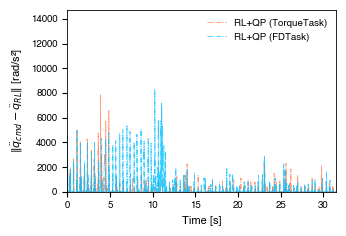

In [12]:
# Plot "forwardDynamic_err" for FDTask and TorqueTask
qddot_err_column = "RLController_qddot_err_norm"
qddot_err_norm_FDTask = df_FDTask[qddot_err_column].values
qddot_err_norm_TorqueTask = df_TorqueTask[qddot_err_column].values
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.plot(df_TorqueTask['t'], qddot_err_norm_TorqueTask, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], linewidth=0.6, linestyle="-.", alpha=0.8)
plt.plot(df_FDTask['t'], qddot_err_norm_FDTask, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], linewidth=0.6, linestyle="-.", alpha=0.8)
plt.xlim(0, min_time_Task)
plt.ylim(0, 14717.7)
plt.xlabel("Time [s]")
plt.ylabel("$\| \\ddot{q}_{cmd}-\\ddot{q}_{RL} \|$ [rad/s²]")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("acceleration_error_comparison_simu.pdf", dpi=300)
plt.show()

In [13]:
# Compute mean and std of position error for FDTask and TorqueTask over the common time range
mean_pos_err_FDTask = qddot_err_norm_FDTask[common_time_mask_FDTask].mean()
std_pos_err_FDTask = qddot_err_norm_FDTask[common_time_mask_FDTask].std()
mean_pos_err_TorqueTask = qddot_err_norm_TorqueTask[common_time_mask_TorqueTask].mean()
std_pos_err_TorqueTask = qddot_err_norm_TorqueTask[common_time_mask_TorqueTask].std()
max_pos_err_FDTask = qddot_err_norm_FDTask[common_time_mask_FDTask].max()
max_pos_err_TorqueTask = qddot_err_norm_TorqueTask[common_time_mask_TorqueTask].max()
print(f"Max acceleration error FDTask: {max_pos_err_FDTask:.2f} rad/s²")
print(f"Max acceleration error TorqueTask: {max_pos_err_TorqueTask:.2f} rad/s²")
print(f"FDTask Acceleration Error: Mean = {mean_pos_err_FDTask:.4f} rad, Std = {std_pos_err_FDTask:.4f} rad")
print(f"TorqueTask Acceleration Error: Mean = {mean_pos_err_TorqueTask:.4f} rad, Std = {std_pos_err_TorqueTask:.4f} rad")

Max acceleration error FDTask: 8291.00 rad/s²
Max acceleration error TorqueTask: 7856.14 rad/s²
FDTask Acceleration Error: Mean = 188.1438 rad, Std = 699.9600 rad
TorqueTask Acceleration Error: Mean = 109.8160 rad, Std = 536.2742 rad


In [14]:
# Compute percentage of how much the FDTask position error is reduced compared to TorqueTask
reduction_percentage_pos = (abs(mean_pos_err_TorqueTask - mean_pos_err_FDTask) / mean_pos_err_TorqueTask) * 100
print(f"FDTask acceleration error reduction compare to TorqueTask: {reduction_percentage_pos:.2f}%")
reduction_percentage_pos_std = (abs(std_pos_err_TorqueTask - std_pos_err_FDTask) / std_pos_err_TorqueTask) * 100
print(f"FDTask acceleration error std reduction compare to TorqueTask: {reduction_percentage_pos_std:.2f}%")

FDTask acceleration error reduction compare to TorqueTask: 71.33%
FDTask acceleration error std reduction compare to TorqueTask: 30.52%


## How many constraints were breached for RL, FDTask, TorqueTask

In [15]:
# Count how much self-collisions were detected under soft and hard limits for RL, FDTask, and TorqueTask
# Search for columns related to self-collisions distance, they start with "CollisionMonitor_" and end with "_distance", between is the names of the two colliding links separated by "::"

collision_columns_distance = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")]
# Soft limit
collision_columns_di = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_di")]
# Hard limit
collision_columns_ds = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_ds")]

def count_self_collisions(df: pd.DataFrame, distance_cols: List[str], di_cols: List[str], ds_cols: List[str]) -> Tuple[int, int]:
    """Count the number of self-collisions detected under soft and hard limits."""
    soft_collisions = 0
    hard_collisions = 0
    for dist_col, di_col, ds_col in zip(distance_cols, di_cols, ds_cols):
        # Count soft collisions (distance < di)
        soft_collisions += (df[dist_col] < df[di_col]).sum()
        # Count soft collisions (distance < ds)
        hard_collisions += (df[dist_col] < df[ds_col]).sum()
    return soft_collisions, hard_collisions

hits_RL_soft_collision, hits_RL_hard_collision = count_self_collisions(df_RL, collision_columns_distance, collision_columns_di, collision_columns_ds)
hits_FDTask_soft_collision, hits_FDTask_hard_collision = count_self_collisions(df_FDTask, collision_columns_distance, collision_columns_di, collision_columns_ds)
hits_TorqueTask_soft_collision, hits_TorqueTask_hard_collision = count_self_collisions(df_TorqueTask, collision_columns_distance, collision_columns_di, collision_columns_ds)

hits_RL_soft_collision_percent = round(hits_RL_soft_collision / min_iterations * 100, 2)
hits_RL_hard_collision_percent = round(hits_RL_hard_collision / min_iterations * 100, 2)
hits_FDTask_soft_collision_percent = round(hits_FDTask_soft_collision / min_iterations * 100, 2)
hits_FDTask_hard_collision_percent = round(hits_FDTask_hard_collision / min_iterations * 100, 2)
hits_TorqueTask_soft_collision_percent = round(hits_TorqueTask_soft_collision / min_iterations * 100, 2)
hits_TorqueTask_hard_collision_percent = round(hits_TorqueTask_hard_collision / min_iterations * 100, 2)

print(f"Self-collisions detected (soft limit): RL = {hits_RL_soft_collision}, FDTask = {hits_FDTask_soft_collision}, TorqueTask = {hits_TorqueTask_soft_collision}")
print(f"Self-collisions detected (hard limit): RL = {hits_RL_hard_collision}, FDTask = {hits_FDTask_hard_collision}, TorqueTask = {hits_TorqueTask_hard_collision}")
print(f"Self-collisions detected percent of time (soft limit): RL = {hits_RL_soft_collision_percent}%, FDTask = {hits_FDTask_soft_collision_percent}%, TorqueTask = {hits_TorqueTask_soft_collision_percent}%")
print(f"Self-collisions detected percent of time (hard limit): RL = {hits_RL_hard_collision_percent}%, FDTask = {hits_FDTask_hard_collision_percent}%, TorqueTask = {hits_TorqueTask_hard_collision_percent}%")

Self-collisions detected (soft limit): RL = 47, FDTask = 0, TorqueTask = 99
Self-collisions detected (hard limit): RL = 26, FDTask = 0, TorqueTask = 25
Self-collisions detected percent of time (soft limit): RL = 0.38%, FDTask = 0.0%, TorqueTask = 0.8%
Self-collisions detected percent of time (hard limit): RL = 0.21%, FDTask = 0.0%, TorqueTask = 0.2%


In [16]:
def compute_limit_excess(df, limit_lower, limit_upper, input_columns):
    """
    Compute the absolute difference between input values and joint limits,
    returning a flat vector of all limit breaches (>0).
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing input signals (e.g., torques).
    limit_lower : list[str] or np.ndarray
        numpy array of constant lower limits (per joint).
    limit_upper : list[str] or np.ndarray
        numpy array of constant upper limits (per joint).
    input_columns : list[str]
        Column names in df for joint inputs (e.g., tauOut per joint).
    limitsInDf : bool, default False
        If True, limits are taken from df columns; otherwise, from arrays.
    
    Returns
    -------
    np.ndarray
        A 1D array containing all excess values (>0), flattened across
        joints and time.
    """
    
    excess_list = []
    
    for i, col in enumerate(input_columns):
        inputs = df[col].values
        lower_limits = np.full_like(inputs, limit_lower[i])
        upper_limits = np.full_like(inputs, limit_upper[i])

        # Compute excesses
        lower_excess = np.maximum(0, lower_limits - inputs)   # input < lower limit
        upper_excess = np.maximum(0, inputs - upper_limits)   # input > upper limit
        
        # Total excess (only positive values are breaches)
        joint_excess = lower_excess + upper_excess
        
        # Collect only breaches
        excess_list.append(joint_excess[joint_excess > 0])
    
    # Flatten everything into one row vector
    if excess_list:
        result = np.concatenate(excess_list)
    else:
        result = np.array([])
    
    return result


In [17]:
# Count how many times the limits are hit for all joints in RL, FDTask, and TorqueTask over the min_time range
def count_limit_hits(df: pd.DataFrame, limit_lower: np.ndarray, limit_upper: np.ndarray, input_columns: List[str]) -> int:
    """Count the number of times limits are hit across all joints"""
    hits = ((df[input_columns] < limit_lower) | (df[input_columns] > limit_upper)).sum().sum()
    return hits


In [18]:
df_FDTask_min = df_FDTask[df_FDTask['t'] <= min_time]
df_TorqueTask_min = df_TorqueTask[df_TorqueTask['t'] <= min_time]
hits_RL_torque = count_limit_hits(df_RL, torque_limit_low, torque_limit_up, torque_column_names)
hits_FDTask_torque = count_limit_hits(df_FDTask_min, torque_limit_low, torque_limit_up, torque_column_names)
hits_TorqueTask_torque = count_limit_hits(df_TorqueTask_min, torque_limit_low, torque_limit_up, torque_column_names)
hits_RL_torque_per_sec = round(hits_RL_torque / (min_iterations * dt), 2)
hits_FDTask_torque_per_sec = round(hits_FDTask_torque / (min_iterations * dt), 2)
hits_TorqueTask_torque_per_sec = round(hits_TorqueTask_torque / (min_iterations * dt), 2)
print(f"Torque limit hits: RL = {hits_RL_torque}, FDTask = {hits_FDTask_torque}, TorqueTask = {hits_TorqueTask_torque}")
print(f"Torque limit hits per second: RL = {hits_RL_torque_per_sec}, FDTask = {hits_FDTask_torque_per_sec}, TorqueTask = {hits_TorqueTask_torque_per_sec}")


Torque limit hits: RL = 261, FDTask = 0, TorqueTask = 0
Torque limit hits per second: RL = 8.42, FDTask = 0.0, TorqueTask = 0.0


In [19]:
hits_RL_q_hard = count_limit_hits(df_RL, q_limit_low, q_limit_up, q_column_names)
hits_FDTask_q_hard = count_limit_hits(df_FDTask_min, q_limit_low, q_limit_up, q_column_names)
hits_TorqueTask_q_hard = count_limit_hits(df_TorqueTask_min, q_limit_low, q_limit_up, q_column_names)
hits_RL_q_hard_per_sec = round(hits_RL_q_hard / (min_iterations * dt), 2)
hits_FDTask_q_hard_per_sec = round(hits_FDTask_q_hard / (min_iterations * dt), 2)
hits_TorqueTask_q_hard_per_sec = round(hits_TorqueTask_q_hard / (min_iterations * dt), 2)
print(f"Position hard limit hits: RL = {hits_RL_q_hard}, FDTask = {hits_FDTask_q_hard}, TorqueTask = {hits_TorqueTask_q_hard}")
print(f"Position hard limit hits per second: RL = {hits_RL_q_hard_per_sec}, FDTask = {hits_FDTask_q_hard_per_sec}, TorqueTask = {hits_TorqueTask_q_hard_per_sec}")

Position hard limit hits: RL = 231, FDTask = 126, TorqueTask = 30
Position hard limit hits per second: RL = 7.45, FDTask = 4.06, TorqueTask = 0.97


In [20]:
hits_RL_q_soft = count_limit_hits(df_RL, q_limit_soft_low, q_limit_soft_up, q_column_names)
hits_FDTask_q_soft = count_limit_hits(df_FDTask_min, q_limit_soft_low, q_limit_soft_up, q_column_names)
hits_TorqueTask_q_soft = count_limit_hits(df_TorqueTask_min, q_limit_soft_low, q_limit_soft_up, q_column_names)
hits_RL_q_soft_per_sec = round(hits_RL_q_soft / (min_iterations * dt), 2)
hits_FDTask_q_soft_per_sec = round(hits_FDTask_q_soft / (min_iterations * dt), 2)
hits_TorqueTask_q_soft_per_sec = round(hits_TorqueTask_q_soft / (min_iterations * dt), 2)
print(f"Position soft limit hits: RL = {hits_RL_q_soft}, FDTask = {hits_FDTask_q_soft}, TorqueTask = {hits_TorqueTask_q_soft}")
print(f"Position soft limit hits per second: RL = {hits_RL_q_soft_per_sec}, FDTask = {hits_FDTask_q_soft_per_sec}, TorqueTask = {hits_TorqueTask_q_soft_per_sec}")

Position soft limit hits: RL = 272, FDTask = 216, TorqueTask = 64
Position soft limit hits per second: RL = 8.77, FDTask = 6.97, TorqueTask = 2.06


In [21]:
hits_RL_qdot_hard = count_limit_hits(df_RL, qdot_limit_low, qdot_limit_up, qdot_column_names)
hits_FDTask_qdot_hard = count_limit_hits(df_FDTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
hits_TorqueTask_qdot_hard = count_limit_hits(df_TorqueTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
hits_RL_qdot_hard_per_sec = round(hits_RL_qdot_hard / (min_iterations * dt), 2)
hits_FDTask_qdot_hard_per_sec = round(hits_FDTask_qdot_hard / (min_iterations * dt), 2)
hits_TorqueTask_qdot_hard_per_sec = round(hits_TorqueTask_qdot_hard / (min_iterations * dt), 2)
print(f"Velocity hard limit hits: RL = {hits_RL_qdot_hard}, FDTask = {hits_FDTask_qdot_hard}, TorqueTask = {hits_TorqueTask_qdot_hard}")
print(f"Velocity hard limit hits per second: RL = {hits_RL_qdot_hard_per_sec}, FDTask = {hits_FDTask_qdot_hard_per_sec}, TorqueTask = {hits_TorqueTask_qdot_hard_per_sec}")


Velocity hard limit hits: RL = 2, FDTask = 0, TorqueTask = 0
Velocity hard limit hits per second: RL = 0.06, FDTask = 0.0, TorqueTask = 0.0


In [22]:
hits_RL_qdot_soft = count_limit_hits(df_RL, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
hits_FDTask_qdot_soft = count_limit_hits(df_FDTask_min, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
hits_TorqueTask_qdot_soft = count_limit_hits(df_TorqueTask_min, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
hits_RL_qdot_soft_per_sec = round(hits_RL_qdot_soft / (min_iterations * dt), 2)
hits_FDTask_qdot_soft_per_sec = round(hits_FDTask_qdot_soft / (min_iterations * dt), 2)
hits_TorqueTask_qdot_soft_per_sec = round(hits_TorqueTask_qdot_soft / (min_iterations * dt), 2)
print(f"Velocity soft limit hits: RL = {hits_RL_qdot_soft}, FDTask = {hits_FDTask_qdot_soft}, TorqueTask = {hits_TorqueTask_qdot_soft}")
print(f"Velocity soft limit hits per second: RL = {hits_RL_qdot_soft_per_sec}, FDTask = {hits_FDTask_qdot_soft_per_sec}, TorqueTask = {hits_TorqueTask_qdot_soft_per_sec}")

Velocity soft limit hits: RL = 4, FDTask = 0, TorqueTask = 0
Velocity soft limit hits per second: RL = 0.13, FDTask = 0.0, TorqueTask = 0.0


In [23]:
# Compute total hits in RL, FDTask, and TorqueTask by summing all types of hard limit hits
total_hits_RL_hard = hits_RL_torque + hits_RL_q_hard + hits_RL_qdot_hard
total_hits_FDTask_hard = hits_FDTask_torque + hits_FDTask_q_hard + hits_FDTask_qdot_hard
total_hits_TorqueTask_hard = hits_TorqueTask_torque + hits_TorqueTask_q_hard + hits_TorqueTask_qdot_hard
total_hits_RL_hard_per_sec = round(total_hits_RL_hard / (min_iterations * dt), 2)
total_hits_FDTask_hard_per_sec = round(total_hits_FDTask_hard / (min_iterations * dt), 2)
total_hits_TorqueTask_hard_per_sec = round(total_hits_TorqueTask_hard / (min_iterations * dt), 2)
print(f"Total hard limit hits: RL = {total_hits_RL_hard}, FDTask = {total_hits_FDTask_hard}, TorqueTask = {total_hits_TorqueTask_hard}")
print(f"Total hard limit hits per second: RL = {total_hits_RL_hard_per_sec}, FDTask = {total_hits_FDTask_hard_per_sec}, TorqueTask = {total_hits_TorqueTask_hard_per_sec}")


# Add the soft limit hits as well if needed
total_hits_RL_soft = total_hits_RL_hard + hits_RL_q_soft + hits_RL_qdot_soft
total_hits_FDTask_soft = total_hits_FDTask_hard + hits_FDTask_q_soft + hits_FDTask_qdot_soft
total_hits_TorqueTask_soft = total_hits_TorqueTask_hard + hits_TorqueTask_q_soft + hits_TorqueTask_qdot_soft
total_hits_RL_soft_per_sec = round(total_hits_RL_soft / (min_iterations * dt), 2)
total_hits_FDTask_soft_per_sec = round(total_hits_FDTask_soft / (min_iterations * dt), 2)
total_hits_TorqueTask_soft_per_sec = round(total_hits_TorqueTask_soft / (min_iterations * dt), 2)
print(f"Total soft limit hits: RL = {total_hits_RL_soft}, FDTask = {total_hits_FDTask_soft}, TorqueTask = {total_hits_TorqueTask_soft}")
print(f"Total soft limit hits per second: RL = {total_hits_RL_soft_per_sec}, FDTask = {total_hits_FDTask_soft_per_sec}, TorqueTask = {total_hits_TorqueTask_soft_per_sec}")

Total hard limit hits: RL = 494, FDTask = 126, TorqueTask = 30
Total hard limit hits per second: RL = 15.93, FDTask = 4.06, TorqueTask = 0.97
Total soft limit hits: RL = 770, FDTask = 342, TorqueTask = 94
Total soft limit hits per second: RL = 24.83, FDTask = 11.03, TorqueTask = 3.03


In [24]:
# Build an array to summarize all results in a table

# | Limits     | q soft | q hard | dot{q} soft | dot{q} hard | col_dist soft | col_dist hard | tau | Tot |
# | ---------- | -------- | -------- | -------------- | -------------- | ------------- | ------------- | ------ | --- |
# | RL         |          |          |                |                |               |               |        |     |
# | TorqueTask |          |          |                |                |               |               |        |     |
# | FDTask     |          |          |                |                |               |               |        |     |

results = {
    "Limits": ["q soft", "q hard", "dot{q} soft", "dot{q} hard", "col_dist soft", "col_dist hard", "tau", "Tot"],
    "RL": [hits_RL_q_soft, hits_RL_q_hard, hits_RL_qdot_soft, hits_RL_qdot_hard, hits_RL_soft_collision, hits_RL_hard_collision, hits_RL_torque, total_hits_RL_hard],
    "TorqueTask": [hits_TorqueTask_q_soft, hits_TorqueTask_q_hard, hits_TorqueTask_qdot_soft, hits_TorqueTask_qdot_hard, hits_TorqueTask_soft_collision, hits_TorqueTask_hard_collision, hits_TorqueTask_torque, total_hits_TorqueTask_hard],
    "FDTask": [hits_FDTask_q_soft, hits_FDTask_q_hard, hits_FDTask_qdot_soft, hits_FDTask_qdot_hard, hits_FDTask_soft_collision, hits_FDTask_hard_collision, hits_FDTask_torque, total_hits_FDTask_hard],
}
results_df = pd.DataFrame(results)
results_df.to_csv("limit_hits_summary.csv", index=False)

print(results_df)
print("\n")

# Same array but with per sec
results_per_sec = {
    "Limits": ["q soft", "q hard", "dot{q} soft", "dot{q} hard", "col_dist soft", "col_dist hard", "tau", "Tot"],
    "RL": [hits_RL_q_soft_per_sec, hits_RL_q_hard_per_sec, hits_RL_qdot_soft_per_sec, hits_RL_qdot_hard_per_sec, hits_RL_soft_collision_percent, hits_RL_hard_collision_percent, hits_RL_torque_per_sec, total_hits_RL_hard_per_sec],
    "TorqueTask": [hits_TorqueTask_q_soft_per_sec, hits_TorqueTask_q_hard_per_sec, hits_TorqueTask_qdot_soft_per_sec, hits_TorqueTask_qdot_hard_per_sec, hits_TorqueTask_soft_collision_percent, hits_TorqueTask_hard_collision_percent, hits_TorqueTask_torque_per_sec, total_hits_TorqueTask_hard_per_sec],
    "FDTask": [hits_FDTask_q_soft_per_sec, hits_FDTask_q_hard_per_sec, hits_FDTask_qdot_soft_per_sec, hits_FDTask_qdot_hard_per_sec, hits_FDTask_soft_collision_percent, hits_FDTask_hard_collision_percent, hits_FDTask_torque_per_sec, total_hits_FDTask_hard_per_sec],
}
results_per_sec_df = pd.DataFrame(results_per_sec)
results_per_sec_df.to_csv("limit_hits_summary_per_sec.csv", index=False)
print(results_per_sec_df)

          Limits   RL  TorqueTask  FDTask
0         q soft  272          64     216
1         q hard  231          30     126
2    dot{q} soft    4           0       0
3    dot{q} hard    2           0       0
4  col_dist soft   47          99       0
5  col_dist hard   26          25       0
6            tau  261           0       0
7            Tot  494          30     126


          Limits     RL  TorqueTask  FDTask
0         q soft   8.77        2.06    6.97
1         q hard   7.45        0.97    4.06
2    dot{q} soft   0.13        0.00    0.00
3    dot{q} hard   0.06        0.00    0.00
4  col_dist soft   0.38        0.80    0.00
5  col_dist hard   0.21        0.20    0.00
6            tau   8.42        0.00    0.00
7            Tot  15.93        0.97    4.06


In [25]:
# Summarize results without soft constraints
results_hard = {
    "Limits": ["q", "dot{q}", "col_dist", "tau", "Tot"],
    "RL": [hits_RL_q_hard, hits_RL_qdot_hard, hits_RL_hard_collision, hits_RL_torque, total_hits_RL_hard],
    "TorqueTask": [hits_TorqueTask_q_hard, hits_TorqueTask_qdot_hard, hits_TorqueTask_hard_collision, hits_TorqueTask_torque, total_hits_TorqueTask_hard],
    "FDTask": [hits_FDTask_q_hard, hits_FDTask_qdot_hard, hits_FDTask_hard_collision, hits_FDTask_torque, total_hits_FDTask_hard],
}
results_hard_df = pd.DataFrame(results_hard)
results_hard_df.to_csv("limit_hits_summary_hard_only.csv", index=False)
print(results_hard_df)
print("\n")

# Same array but with per sec
results_hard_per_sec = {
    "Limits": ["q", "dot{q}", "col_dist", "tau", "Tot"],
    "RL": [hits_RL_q_hard_per_sec, hits_RL_qdot_hard_per_sec, hits_RL_hard_collision_percent, hits_RL_torque_per_sec, total_hits_RL_hard_per_sec],
    "TorqueTask": [hits_TorqueTask_q_hard_per_sec, hits_TorqueTask_qdot_hard_per_sec, hits_TorqueTask_hard_collision_percent, hits_TorqueTask_torque_per_sec, total_hits_TorqueTask_hard_per_sec],
    "FDTask": [hits_FDTask_q_hard_per_sec, hits_FDTask_qdot_hard_per_sec, hits_FDTask_hard_collision_percent, hits_FDTask_torque_per_sec, total_hits_FDTask_hard_per_sec],
}
results_hard_per_sec_df = pd.DataFrame(results_hard_per_sec)
results_hard_per_sec_df.to_csv("limit_hits_summary_hard_only_per_sec.csv", index=False)
print(results_hard_per_sec_df)

     Limits   RL  TorqueTask  FDTask
0         q  231          30     126
1    dot{q}    2           0       0
2  col_dist   26          25       0
3       tau  261           0       0
4       Tot  494          30     126


     Limits     RL  TorqueTask  FDTask
0         q   7.45        0.97    4.06
1    dot{q}   0.06        0.00    0.00
2  col_dist   0.21        0.20    0.00
3       tau   8.42        0.00    0.00
4       Tot  15.93        0.97    4.06


In [26]:
# Compute the percentage of time spent beyond limits for all joints in RL, FDTask, and TorqueTask over the min_time range
def compute_percentage_time_beyond_limits(df: pd.DataFrame, limit_lower: np.ndarray, limit_upper: np.ndarray, input_columns: List[str]) -> float:
    """Compute the percentage of time spent beyond limits across all joints"""
    total_entries = df.shape[0] #* len(input_columns)
    beyond_limits = ((df[input_columns] < limit_lower) | (df[input_columns] > limit_upper)).sum().sum()
    percentage = (beyond_limits / total_entries) * 100
    return percentage

In [27]:
# Show the percentage of time spent beyond limits
percentage_RL_torque = compute_percentage_time_beyond_limits(df_RL, torque_limit_low, torque_limit_up, torque_column_names)
percentage_FDTask_torque = compute_percentage_time_beyond_limits(df_FDTask_min, torque_limit_low, torque_limit_up, torque_column_names) 
percentage_TorqueTask_torque = compute_percentage_time_beyond_limits(df_TorqueTask_min, torque_limit_low, torque_limit_up, torque_column_names)
print(f"Percentage of time beyond torque limits: RL = {percentage_RL_torque:.4f}%, FDTask = {percentage_FDTask_torque:.4f}%, TorqueTask = {percentage_TorqueTask_torque:.4f}%") 
percentage_RL_q_hard = compute_percentage_time_beyond_limits(df_RL, q_limit_low, q_limit_up, q_column_names)
percentage_FDTask_q_hard = compute_percentage_time_beyond_limits(df_FDTask_min, q_limit_low, q_limit_up, q_column_names)
percentage_TorqueTask_q_hard = compute_percentage_time_beyond_limits(df_TorqueTask_min, q_limit_low, q_limit_up, q_column_names)
print(f"Percentage of time beyond position hard limits: RL = {percentage_RL_q_hard:.4f}%, FDTask = {percentage_FDTask_q_hard:.4f}%, TorqueTask = {percentage_TorqueTask_q_hard:.4f}%") 
percentage_RL_q_soft = compute_percentage_time_beyond_limits(df_RL, q_limit_soft_low, q_limit_soft_up, q_column_names)
percentage_FDTask_q_soft = compute_percentage_time_beyond_limits(df_FDTask_min, q_limit_soft_low, q_limit_soft_up, q_column_names)
percentage_TorqueTask_q_soft = compute_percentage_time_beyond_limits(df_TorqueTask_min, q_limit_soft_low, q_limit_soft_up, q_column_names)
print(f"Percentage of time beyond position soft limits: RL = {percentage_RL_q_soft:.4f}%, FDTask = {percentage_FDTask_q_soft:.4f}%, TorqueTask = {percentage_TorqueTask_q_soft:.4f}%") 
percentage_RL_qdot_hard = compute_percentage_time_beyond_limits(df_RL, qdot_limit_low, qdot_limit_up, qdot_column_names)
percentage_FDTask_qdot_hard = compute_percentage_time_beyond_limits(df_FDTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
percentage_TorqueTask_qdot_hard = compute_percentage_time_beyond_limits(df_TorqueTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
print(f"Percentage of time beyond velocity hard limits: RL = {percentage_RL_qdot_hard:.4f}%, FDTask = {percentage_FDTask_qdot_hard:.4f}%, TorqueTask = {percentage_TorqueTask_qdot_hard:.4f}%") 
percentage_RL_qdot_soft = compute_percentage_time_beyond_limits(df_RL, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
percentage_FDTask_qdot_soft = compute_percentage_time_beyond_limits(df_FDTask_min, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
percentage_TorqueTask_qdot_soft = compute_percentage_time_beyond_limits(df_TorqueTask_min, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
print(f"Percentage of time beyond velocity soft limits: RL = {percentage_RL_qdot_soft:.4f}%, FDTask = {percentage_FDTask_qdot_soft:.4f}%, TorqueTask = {percentage_TorqueTask_qdot_soft:.4f}%")
percentage_RL_col_soft = compute_percentage_time_beyond_limits(df_RL, collision_limit_soft, np.inf, [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
percentage_FDTask_col_soft = compute_percentage_time_beyond_limits(df_FDTask_min, collision_limit_soft, np.inf, [col for col in df_FDTask_min.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
percentage_TorqueTask_col_soft = compute_percentage_time_beyond_limits(df_TorqueTask_min, collision_limit_soft, np.inf, [col for col in df_TorqueTask_min.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
print(f"Percentage of time beyond collision soft limits: RL = {percentage_RL_col_soft:.4f}%, FDTask = {percentage_FDTask_col_soft:.4f}%, TorqueTask = {percentage_TorqueTask_col_soft:.4f}%") 
percentage_RL_col_hard = compute_percentage_time_beyond_limits(df_RL, collision_limit, np.inf, [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
percentage_FDTask_col_hard = compute_percentage_time_beyond_limits(df_FDTask_min, collision_limit, np.inf, [col for col in df_FDTask_min.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
percentage_TorqueTask_col_hard = compute_percentage_time_beyond_limits(df_TorqueTask_min, collision_limit, np.inf, [col for col in df_TorqueTask_min.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
print(f"Percentage of time beyond collision hard limits: RL = {percentage_RL_col_hard:.4f}%, FDTask = {percentage_FDTask_col_hard:.4f}%, TorqueTask = {percentage_TorqueTask_col_hard:.4f}%")   

Percentage of time beyond torque limits: RL = 2.1045%, FDTask = 0.0000%, TorqueTask = 0.0000%
Percentage of time beyond position hard limits: RL = 1.8626%, FDTask = 1.0160%, TorqueTask = 0.2419%
Percentage of time beyond position soft limits: RL = 2.1932%, FDTask = 1.7417%, TorqueTask = 0.5160%
Percentage of time beyond velocity hard limits: RL = 0.0161%, FDTask = 0.0000%, TorqueTask = 0.0000%
Percentage of time beyond velocity soft limits: RL = 0.0323%, FDTask = 0.0000%, TorqueTask = 0.0000%
Percentage of time beyond collision soft limits: RL = 0.3790%, FDTask = 0.0000%, TorqueTask = 0.7983%
Percentage of time beyond collision hard limits: RL = 0.2096%, FDTask = 0.0000%, TorqueTask = 0.2016%


In [28]:
# Show the percentage of time spent beyond limits in a table without soft constraints
results_percentage_hard = {
    "Limits": ["q", "dot{q}", "col_dist", "tau", "Tot"],
    "RL": [percentage_RL_q_hard, percentage_RL_qdot_hard, percentage_RL_col_hard, percentage_RL_torque, (percentage_RL_q_hard + percentage_RL_qdot_hard + percentage_RL_col_hard + percentage_RL_torque)],
    "TorqueTask": [percentage_TorqueTask_q_hard, percentage_TorqueTask_qdot_hard, percentage_TorqueTask_col_hard, percentage_TorqueTask_torque, (percentage_TorqueTask_q_hard + percentage_TorqueTask_qdot_hard + percentage_TorqueTask_col_hard + percentage_TorqueTask_torque)],
    "FDTask": [percentage_FDTask_q_hard, percentage_FDTask_qdot_hard, percentage_FDTask_col_hard, percentage_FDTask_torque, (percentage_FDTask_q_hard + percentage_FDTask_qdot_hard + percentage_FDTask_col_hard + percentage_FDTask_torque)],
}
results_percentage_hard_df = pd.DataFrame(results_percentage_hard)
results_percentage_hard_df.to_csv("percentage_time_beyond_limits_hard_only.csv", index=False)
print(results_percentage_hard_df)

     Limits        RL  TorqueTask    FDTask
0         q  1.862603    0.241896  1.015965
1    dot{q}  0.016126    0.000000  0.000000
2  col_dist  0.209644    0.201580  0.000000
3       tau  2.104499    0.000000  0.000000
4       Tot  4.192872    0.443477  1.015965


Torque excess samples: RL = 261, FDTask = 0, TorqueTask = 0


/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


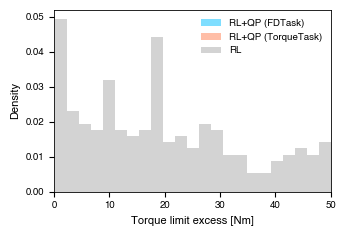

RL Torque Limit Excess: Mean = 23.95 Nm, Std = 17.99 Nm
FDTask Torque Limit Excess: Mean = nan Nm, Std = nan Nm
TorqueTask Torque Limit Excess: Mean = nan Nm, Std = nan Nm
RL Max Torque Limit Excess: 65.18 Nm
FDTask Max Torque Limit Excess: 0.00 Nm
TorqueTask Max Torque Limit Excess: 0.00 Nm


/tmp/ipykernel_30560/1164955527.py:25: RuntimeWarning: Mean of empty slice.
  mean_torque_excess_FDTask = torque_excess_FDTask.mean()
/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_30560/1

In [29]:
# Compute the torque excess mean and std when the limits are hit for RL, FDTask, and TorqueTask over the min_time range
torque_excess_RL = compute_limit_excess(df_RL, torque_limit_low, torque_limit_up, torque_column_names)
torque_excess_FDTask = compute_limit_excess(df_FDTask_min, torque_limit_low, torque_limit_up, torque_column_names)
torque_excess_TorqueTask = compute_limit_excess(df_TorqueTask_min, torque_limit_low, torque_limit_up, torque_column_names)


print(f"Torque excess samples: RL = {torque_excess_RL.size}, FDTask = {torque_excess_FDTask.size}, TorqueTask = {torque_excess_TorqueTask.size}")

# Show a plot with the histogram of the torque excess for RL, FDTask, and TorqueTask
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.hist(torque_excess_FDTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], density=True)
plt.hist(torque_excess_TorqueTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], density=True)
plt.hist(torque_excess_RL, bins=30, alpha=0.5, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], density=True)
plt.xlabel("Torque limit excess [Nm]")
plt.ylabel("Density")
plt.xlim(0, 50)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("torque_limit_excess_histogram_simu.pdf", dpi=300)
plt.show()

mean_torque_excess_RL = torque_excess_RL.mean()
std_torque_excess_RL = torque_excess_RL.std()
mean_torque_excess_FDTask = torque_excess_FDTask.mean()
std_torque_excess_FDTask = torque_excess_FDTask.std()
mean_torque_excess_TorqueTask = torque_excess_TorqueTask.mean()
std_torque_excess_TorqueTask = torque_excess_TorqueTask.std()
max_torque_excess_RL = torque_excess_RL.max() if torque_excess_RL.size > 0 else 0
max_torque_excess_FDTask = torque_excess_FDTask.max() if torque_excess_FDTask.size > 0 else 0
max_torque_excess_TorqueTask = torque_excess_TorqueTask.max() if torque_excess_TorqueTask.size > 0 else 0
print(f"RL Torque Limit Excess: Mean = {mean_torque_excess_RL:.2f} Nm, Std = {std_torque_excess_RL:.2f} Nm")
print(f"FDTask Torque Limit Excess: Mean = {mean_torque_excess_FDTask:.2f} Nm, Std = {std_torque_excess_FDTask:.2f} Nm")
print(f"TorqueTask Torque Limit Excess: Mean = {mean_torque_excess_TorqueTask:.2f} Nm, Std = {std_torque_excess_TorqueTask:.2f} Nm")
print(f"RL Max Torque Limit Excess: {max_torque_excess_RL:.2f} Nm")
print(f"FDTask Max Torque Limit Excess: {max_torque_excess_FDTask:.2f} Nm")
print(f"TorqueTask Max Torque Limit Excess: {max_torque_excess_TorqueTask:.2f} Nm")


Position excess samples: RL = 231, FDTask = 126, TorqueTask = 30
Using 11 bins for the histogram based on Freedman-Diaconis rule.


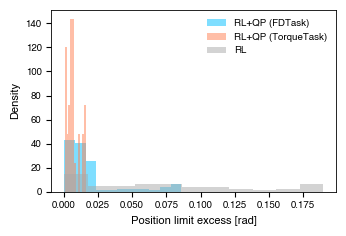

RL Position Limit Excess: Mean = 0.0727 rad, Std = 0.0576 rad
FDTask Position Limit Excess: Mean = 0.0186 rad, Std = 0.0214 rad
TorqueTask Position Limit Excess: Mean = 0.0067 rad, Std = 0.0045 rad
RL Max Position Limit Excess: 0.1896 rad
FDTask Max Position Limit Excess: 0.0859 rad
TorqueTask Max Position Limit Excess: 0.0159 rad


In [30]:
# Compute the position excess mean and std when the limits are hit for RL, FDTask, and TorqueTask over the min_time range
q_excess_RL = compute_limit_excess(df_RL, q_limit_low, q_limit_up, q_column_names)
q_excess_FDTask = compute_limit_excess(df_FDTask_min, q_limit_low, q_limit_up, q_column_names)
q_excess_TorqueTask = compute_limit_excess(df_TorqueTask_min, q_limit_low, q_limit_up, q_column_names)
print(f"Position excess samples: RL = {q_excess_RL.size}, FDTask = {q_excess_FDTask.size}, TorqueTask = {q_excess_TorqueTask.size}")

def freedman_diaconis_bins(data):
    data = np.asarray(data)
    data = data[~np.isnan(data)]
    n = data.size
    if n < 2:
        return 1
    iqr = np.subtract(*np.percentile(data, [75, 25]))
    bin_width = 2 * iqr / np.cbrt(n) if iqr > 0 else np.std(data) * 2 / np.cbrt(n)
    bin_count = int(np.ceil((data.max() - data.min()) / bin_width)) if bin_width > 0 else 1
    return max(1, bin_count)

# Example: determine a shared number of bins across all datasets
all_data = np.concatenate([q_excess_RL, q_excess_FDTask, q_excess_TorqueTask])
n_bins = freedman_diaconis_bins(all_data)
print(f"Using {n_bins} bins for the histogram based on Freedman-Diaconis rule.")


# Show a plot with the histogram of the position excess for RL, FDTask, and TorqueTask
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.hist(q_excess_FDTask, bins=n_bins, alpha=0.5, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], density=True)
plt.hist(q_excess_TorqueTask, bins=n_bins, alpha=0.5, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], density=True)
plt.hist(q_excess_RL, bins=n_bins, alpha=0.5, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], density=True)
plt.xlabel("Position limit excess [rad]")
plt.ylabel("Density")
# plt.xlim(0, 0.5)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("position_limit_excess_histogram_simu.pdf", dpi=300)
plt.show()

mean_q_excess_RL = q_excess_RL.mean()
std_q_excess_RL = q_excess_RL.std()
mean_q_excess_FDTask = q_excess_FDTask.mean()
std_q_excess_FDTask = q_excess_FDTask.std()
mean_q_excess_TorqueTask = q_excess_TorqueTask.mean()
std_q_excess_TorqueTask = q_excess_TorqueTask.std()
max_q_excess_RL = q_excess_RL.max() if q_excess_RL.size > 0 else 0
max_q_excess_FDTask = q_excess_FDTask.max() if q_excess_FDTask.size > 0 else 0
max_q_excess_TorqueTask = q_excess_TorqueTask.max() if q_excess_TorqueTask.size > 0 else 0
print(f"RL Position Limit Excess: Mean = {mean_q_excess_RL:.4f} rad, Std = {std_q_excess_RL:.4f} rad")
print(f"FDTask Position Limit Excess: Mean = {mean_q_excess_FDTask:.4f} rad, Std = {std_q_excess_FDTask:.4f} rad")
print(f"TorqueTask Position Limit Excess: Mean = {mean_q_excess_TorqueTask:.4f} rad, Std = {std_q_excess_TorqueTask:.4f} rad")
print(f"RL Max Position Limit Excess: {max_q_excess_RL:.4f} rad")
print(f"FDTask Max Position Limit Excess: {max_q_excess_FDTask:.4f} rad")
print(f"TorqueTask Max Position Limit Excess: {max_q_excess_TorqueTask:.4f} rad")


In [31]:
# Compute how much the magnitude of joint positions is reduced compared to RL for FDTask and TorqueTask (mean)
mean_q_excess_FDTask_vs_RL_percent = (mean_q_excess_RL - mean_q_excess_FDTask) / mean_q_excess_RL * 100 if mean_q_excess_RL != 0 else np.inf
mean_q_excess_TorqueTask_vs_RL_percent = (mean_q_excess_RL - mean_q_excess_TorqueTask) / mean_q_excess_RL * 100 if mean_q_excess_RL != 0 else np.inf
print(f"FDTask Position Limit Excess reduction vs RL: Mean = {mean_q_excess_FDTask_vs_RL_percent:.2f}%")
print(f"TorqueTask Position Limit Excess reduction vs RL: Mean = {mean_q_excess_TorqueTask_vs_RL_percent:.2f}%")


FDTask Position Limit Excess reduction vs RL: Mean = 74.39%
TorqueTask Position Limit Excess reduction vs RL: Mean = 90.76%


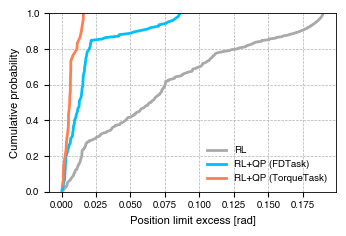

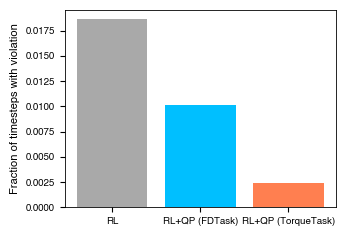

95th Percentile of Position Limit Excess: RL = 0.1845 rad, FDTask = 0.0768 rad, TorqueTask = 0.0154 rad


In [32]:
def plot_cdf(data, label, color):
    if data.size > 0:
        sorted_data = np.sort(data)
        yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
        plt.plot(sorted_data, yvals, label=label, color=color, linewidth=2)

plt.figure(figsize=(3.5, 2.4))
plot_cdf(q_excess_RL, STATE_LABELS["RLController_PureRL"], STATE_COLORS["RLController_PureRL"])
plot_cdf(q_excess_FDTask, STATE_LABELS["RLController_FDTask_pos"], STATE_COLORS["RLController_FDTask_pos"])
plot_cdf(q_excess_TorqueTask, STATE_LABELS["RLController_TorqueTask_pos"], STATE_COLORS["RLController_TorqueTask_pos"])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("Position limit excess [rad]")
plt.ylabel("Cumulative probability")
plt.ylim(0, 1)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.savefig("position_limit_excess_cdf.pdf", dpi=300)
plt.show()

# --- Violation frequency bar chart ---
# Fraction of samples that exceed zero
def violation_fraction(q_excess, total_samples):
    return q_excess.size / total_samples if total_samples > 0 else 0.0

# Assuming df_RL etc. are your time series dataframes with timesteps
frac_RL = violation_fraction(q_excess_RL, len(df_RL))
frac_FD = violation_fraction(q_excess_FDTask, len(df_FDTask_min))
frac_Torque = violation_fraction(q_excess_TorqueTask, len(df_TorqueTask_min))

fractions = [frac_RL, frac_FD, frac_Torque]
labels = [STATE_LABELS["RLController_PureRL"],
          STATE_LABELS["RLController_FDTask_pos"],
          STATE_LABELS["RLController_TorqueTask_pos"]]
colors = [STATE_COLORS["RLController_PureRL"],
          STATE_COLORS["RLController_FDTask_pos"],
          STATE_COLORS["RLController_TorqueTask_pos"]]

plt.figure(figsize=(3.5, 2.4))
plt.bar(labels, fractions, color=colors)
plt.ylabel("Fraction of timesteps with violation")
# plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("position_limit_excess_fraction.pdf", dpi=300)
plt.show()

percentile_95_RL = np.percentile(q_excess_RL, 95) if q_excess_RL.size > 0 else 0
percentile_95_FDTask = np.percentile(q_excess_FDTask, 95) if q_excess_FDTask.size > 0 else 0
percentile_95_TorqueTask = np.percentile(q_excess_TorqueTask, 95) if q_excess_TorqueTask.size > 0 else 0
print(f"95th Percentile of Position Limit Excess: RL = {percentile_95_RL:.4f} rad, FDTask = {percentile_95_FDTask:.4f} rad, TorqueTask = {percentile_95_TorqueTask:.4f} rad")

Velocity excess samples: RL = 2, FDTask = 0, TorqueTask = 0


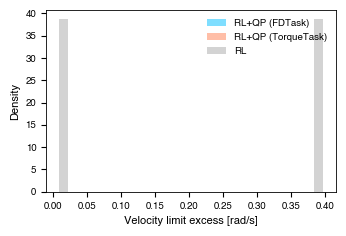

RL Velocity Limit Excess: Mean = 0.2030 rad/s, Std = 0.1932 rad/s
FDTask Velocity Limit Excess: Mean = nan rad/s, Std = nan rad/s
TorqueTask Velocity Limit Excess: Mean = nan rad/s, Std = nan rad/s
RL Max Velocity Limit Excess: 0.3962 rad/s
FDTask Max Velocity Limit Excess: 0.0000 rad/s
TorqueTask Max Velocity Limit Excess: 0.0000 rad/s


/tmp/ipykernel_30560/72382968.py:21: RuntimeWarning: Mean of empty slice.
  mean_qdot_excess_FDTask = qdot_excess_FDTask.mean()
/tmp/ipykernel_30560/72382968.py:23: RuntimeWarning: Mean of empty slice.
  mean_qdot_excess_TorqueTask = qdot_excess_TorqueTask.mean()


In [33]:
# Compute the velocity excess mean and std when the limits are hit for RL, FDTask, and TorqueTask over the min_time range
qdot_excess_RL = compute_limit_excess(df_RL, qdot_limit_low, qdot_limit_up, qdot_column_names)
qdot_excess_FDTask = compute_limit_excess(df_FDTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
qdot_excess_TorqueTask = compute_limit_excess(df_TorqueTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
print(f"Velocity excess samples: RL = {qdot_excess_RL.size}, FDTask = {qdot_excess_FDTask.size}, TorqueTask = {qdot_excess_TorqueTask.size}")
# Show a plot with the histogram of the velocity excess for RL, FDTask, and TorqueTask
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.hist(qdot_excess_FDTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], density=True)
plt.hist(qdot_excess_TorqueTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], density=True)
plt.hist(qdot_excess_RL, bins=30, alpha=0.5, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], density=True)
plt.xlabel("Velocity limit excess [rad/s]")
plt.ylabel("Density")
# plt.xlim(0, 5)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("velocity_limit_excess_histogram_simu.pdf", dpi=300)
plt.show()
mean_qdot_excess_RL = qdot_excess_RL.mean()
std_qdot_excess_RL = qdot_excess_RL.std()
mean_qdot_excess_FDTask = qdot_excess_FDTask.mean()
std_qdot_excess_FDTask = qdot_excess_FDTask.std()
mean_qdot_excess_TorqueTask = qdot_excess_TorqueTask.mean()
std_qdot_excess_TorqueTask = qdot_excess_TorqueTask.std()
max_qdot_excess_RL = qdot_excess_RL.max() if qdot_excess_RL.size > 0 else 0
max_qdot_excess_FDTask = qdot_excess_FDTask.max() if qdot_excess_FDTask.size > 0 else 0
max_qdot_excess_TorqueTask = qdot_excess_TorqueTask.max() if qdot_excess_TorqueTask.size > 0 else 0
print(f"RL Velocity Limit Excess: Mean = {mean_qdot_excess_RL:.4f} rad/s, Std = {std_qdot_excess_RL:.4f} rad/s")
print(f"FDTask Velocity Limit Excess: Mean = {mean_qdot_excess_FDTask:.4f} rad/s, Std = {std_qdot_excess_FDTask:.4f} rad/s")
print(f"TorqueTask Velocity Limit Excess: Mean = {mean_qdot_excess_TorqueTask:.4f} rad/s, Std = {std_qdot_excess_TorqueTask:.4f} rad/s")
print(f"RL Max Velocity Limit Excess: {max_qdot_excess_RL:.4f} rad/s")
print(f"FDTask Max Velocity Limit Excess: {max_qdot_excess_FDTask:.4f} rad/s")
print(f"TorqueTask Max Velocity Limit Excess: {max_qdot_excess_TorqueTask:.4f} rad/s")


In [34]:
# Compute the collision distance excess mean and std when the limits are hit for RL, FDTask, and TorqueTask over the min_time range

# Convert limit col to array with the same length as the number of collision columns
collision_columns = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")]
collision_limit_array = np.full((len(collision_columns),), collision_limit)
collision_soft_limit_array = np.full((len(collision_columns),), collision_limit_soft)

# Create a large array for the higher limits
large_limit_array = np.full((len(collision_columns),), 1e6)
col_excess_RL = compute_limit_excess(df_RL, collision_limit_array, large_limit_array, collision_columns)
col_excess_FDTask = compute_limit_excess(df_FDTask_min, collision_limit_array, large_limit_array, collision_columns)
col_excess_TorqueTask = compute_limit_excess(df_TorqueTask_min, collision_limit_array, large_limit_array, collision_columns)
print(f"Collision excess samples: RL = {col_excess_RL.size}, FDTask = {col_excess_FDTask.size}, TorqueTask = {col_excess_TorqueTask.size}")

Collision excess samples: RL = 26, FDTask = 0, TorqueTask = 25


Using 10 bins for the histogram based on Freedman-Diaconis rule.


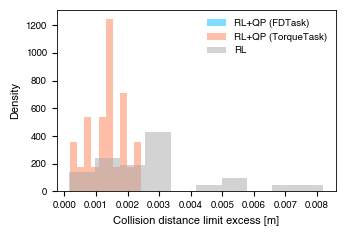

RL Collision Distance Limit Excess: Mean = 0.0029 m, Std = 0.0019 m
FDTask Collision Distance Limit Excess: Mean = nan m, Std = nan m
TorqueTask Collision Distance Limit Excess: Mean = 0.0014 m, Std = 0.0006 m
RL Max Collision Distance Limit Excess: 0.0082 m
FDTask Max Collision Distance Limit Excess: 0.0000 m
TorqueTask Max Collision Distance Limit Excess: 0.0024 m


/tmp/ipykernel_30560/3858083356.py:19: RuntimeWarning: Mean of empty slice.
  mean_col_excess_FDTask = col_excess_FDTask.mean()


In [35]:
# Show a plot with the histogram of the collision distance excess for RL, FDTask, and TorqueTask
n_bins = freedman_diaconis_bins(np.concatenate([col_excess_RL, col_excess_FDTask, col_excess_TorqueTask]))
print(f"Using {n_bins} bins for the histogram based on Freedman-Diaconis rule.")

icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.hist(col_excess_FDTask, bins=n_bins, alpha=0.5, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], density=True)
plt.hist(col_excess_TorqueTask, bins=n_bins, alpha=0.5, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], density=True)
plt.hist(col_excess_RL, bins=n_bins, alpha=0.5, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], density=True)
plt.xlabel("Collision distance limit excess [m]")
plt.ylabel("Density")
# plt.xlim(0, 0.05)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("collision_distance_limit_excess_histogram_simu.pdf", dpi=300)
plt.show()
mean_col_excess_RL = col_excess_RL.mean()
std_col_excess_RL = col_excess_RL.std()
mean_col_excess_FDTask = col_excess_FDTask.mean()
std_col_excess_FDTask = col_excess_FDTask.std()
mean_col_excess_TorqueTask = col_excess_TorqueTask.mean()
std_col_excess_TorqueTask = col_excess_TorqueTask.std()
max_col_excess_RL = col_excess_RL.max() if col_excess_RL.size > 0 else 0
max_col_excess_FDTask = col_excess_FDTask.max() if col_excess_FDTask.size > 0 else 0
max_col_excess_TorqueTask = col_excess_TorqueTask.max() if col_excess_TorqueTask.size > 0 else 0
print(f"RL Collision Distance Limit Excess: Mean = {mean_col_excess_RL:.4f} m, Std = {std_col_excess_RL:.4f} m")
print(f"FDTask Collision Distance Limit Excess: Mean = {mean_col_excess_FDTask:.4f} m, Std = {std_col_excess_FDTask:.4f} m")
print(f"TorqueTask Collision Distance Limit Excess: Mean = {mean_col_excess_TorqueTask:.4f} m, Std = {std_col_excess_TorqueTask:.4f} m")
print(f"RL Max Collision Distance Limit Excess: {max_col_excess_RL:.4f} m")
print(f"FDTask Max Collision Distance Limit Excess: {max_col_excess_FDTask:.4f} m")
print(f"TorqueTask Max Collision Distance Limit Excess: {max_col_excess_TorqueTask:.4f} m")


In [36]:
# Compute how much the magnitude of the collision distances is reduced compared to RL for FDTask and TorqueTask (mean)
mean_col_excess_FDTask_vs_RL_percent = (mean_col_excess_RL - mean_col_excess_FDTask) / mean_col_excess_RL * 100 if mean_col_excess_RL != 0 else np.inf
mean_col_excess_TorqueTask_vs_RL_percent = (mean_col_excess_RL - mean_col_excess_TorqueTask) / mean_col_excess_RL * 100 if mean_col_excess_RL != 0 else np.inf
print(f"FDTask Collision Distance Limit Excess reduction vs RL: Mean = {mean_col_excess_FDTask_vs_RL_percent:.2f}%")
print(f"TorqueTask Collision Distance Limit Excess reduction vs RL: Mean = {mean_col_excess_TorqueTask_vs_RL_percent:.2f}%")

FDTask Collision Distance Limit Excess reduction vs RL: Mean = nan%
TorqueTask Collision Distance Limit Excess reduction vs RL: Mean = 53.55%


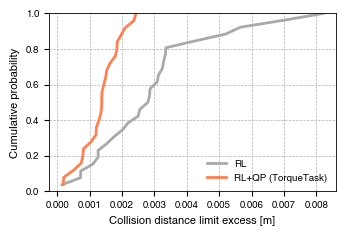

95th Percentile of Collision Distance Limit Excess: RL = 0.0066 m, FDTask = 0.0000 m, TorqueTask = 0.0023 m


In [37]:
plt.figure(figsize=(3.5, 2.4))
plot_cdf(col_excess_RL, STATE_LABELS["RLController_PureRL"], STATE_COLORS["RLController_PureRL"])
plot_cdf(col_excess_FDTask, STATE_LABELS["RLController_FDTask_pos"], STATE_COLORS["RLController_FDTask_pos"])
plot_cdf(col_excess_TorqueTask, STATE_LABELS["RLController_TorqueTask_pos"], STATE_COLORS["RLController_TorqueTask_pos"])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("Collision distance limit excess [m]")
plt.ylabel("Cumulative probability")
plt.ylim(0, 1)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.savefig("collision_distance_limit_excess_cdf.pdf", dpi=300)
plt.show()
percentile_95_RL_col = np.percentile(col_excess_RL, 95) if col_excess_RL.size > 0 else 0
percentile_95_FDTask_col = np.percentile(col_excess_FDTask, 95) if col_excess_FDTask.size > 0 else 0
percentile_95_TorqueTask_col = np.percentile(col_excess_TorqueTask, 95) if col_excess_TorqueTask.size > 0 else 0
print(f"95th Percentile of Collision Distance Limit Excess: RL = {percentile_95_RL_col:.4f} m, FDTask = {percentile_95_FDTask_col:.4f} m, TorqueTask = {percentile_95_TorqueTask_col:.4f} m")